In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/athir/Downloads/Bank.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
import matplotlib.pyplot as plt

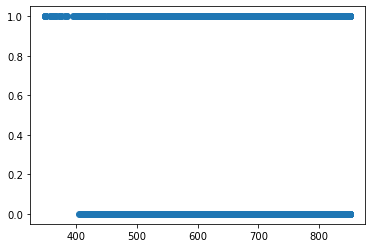

In [5]:
plt.scatter(df['CreditScore'],df['Exited'])

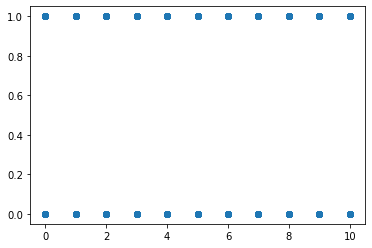

In [6]:
plt.scatter(df['Tenure'],df['Exited'])

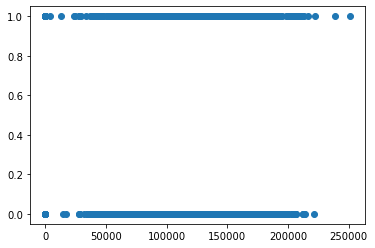

In [7]:
plt.scatter(df['Balance'],df['Exited'])

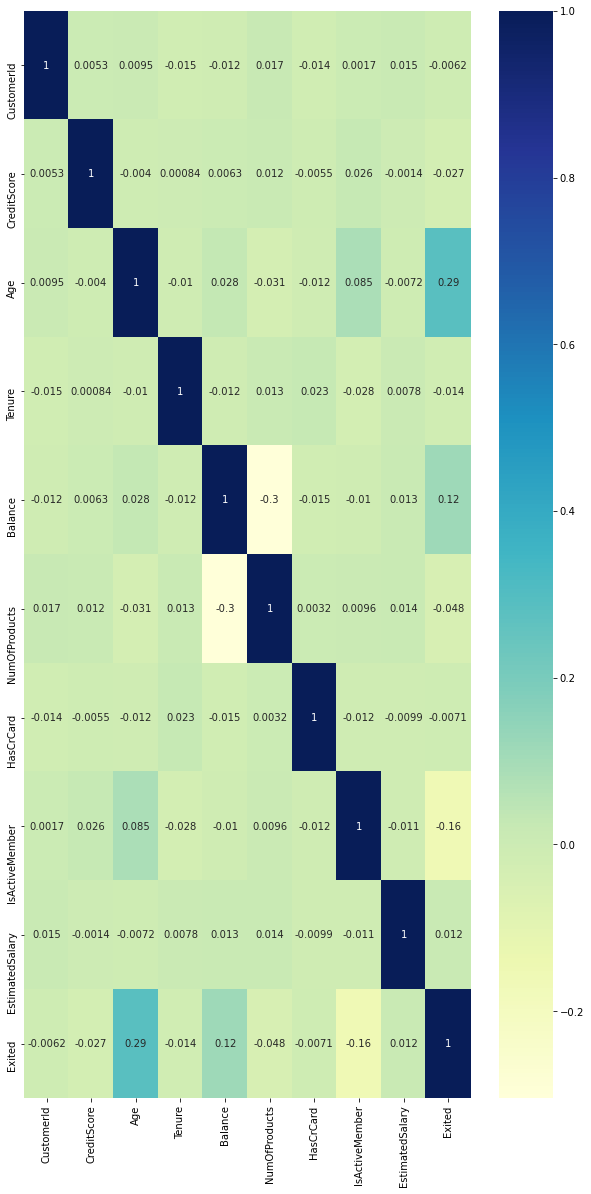

In [8]:
col=['CustomerId','CreditScore','Geography','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']
plt.figure(figsize=(10,20))
sns.heatmap(df[col].corr(),annot=True, cmap="YlGnBu")
plt.show()

In [9]:
df=pd.get_dummies(df,columns=["Geography"])

In [10]:
df=pd.get_dummies(df,columns=["Gender"])

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [12]:
df.isnull().sum(axis="rows")

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

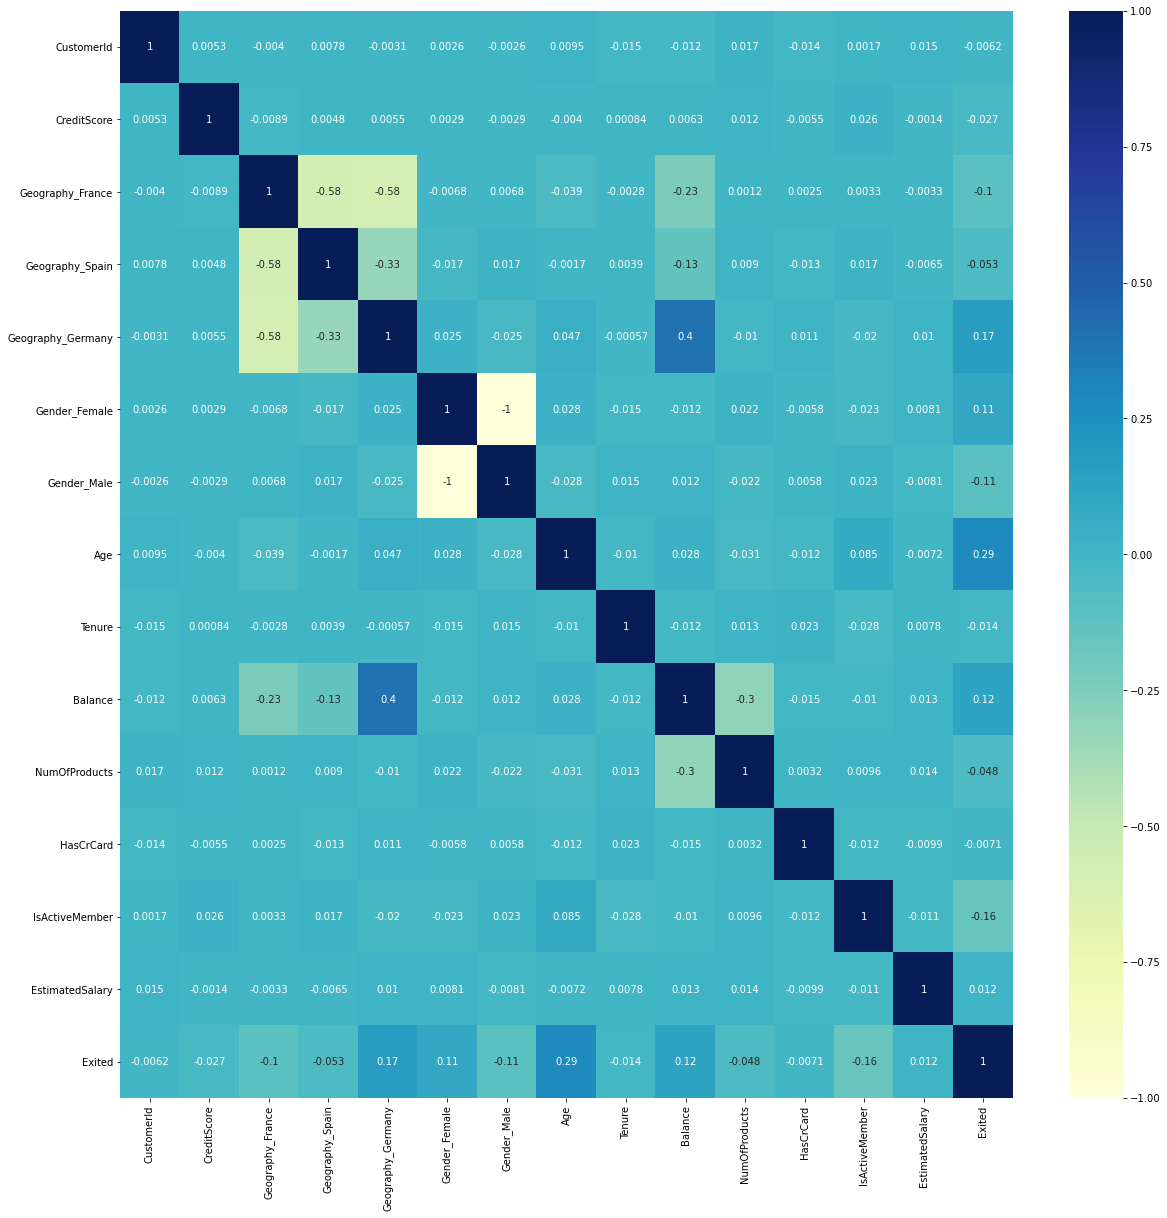

In [13]:
col=['CustomerId','CreditScore','Geography_France','Geography_Spain','Geography_Germany','Gender_Female','Gender_Male','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']
plt.figure(figsize=(20,20))
sns.heatmap(df[col].corr(),annot=True, cmap="YlGnBu")
plt.show()

In [14]:
x=df[["CreditScore","Age","Gender_Female","Gender_Male","Geography_France","Geography_Germany","Geography_Spain","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].values
y=df["Exited"].values

In [15]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_target,test_target = train_test_split(x,y,test_size=0.1,random_state=10)

In [16]:
train_features.shape,test_features.shape,train_target.shape,test_target.shape

((9000, 13), (1000, 13), (9000,), (1000,))

In [17]:
type(train_features)

numpy.ndarray

# K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
model=KNeighborsClassifier(n_neighbors=50, p=2,metric='euclidean')
model.fit(train_features,train_target)

KNeighborsClassifier(metric='euclidean', n_neighbors=50)

In [74]:
predictions=model.predict(test_features)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

 Confusion Matrix: 


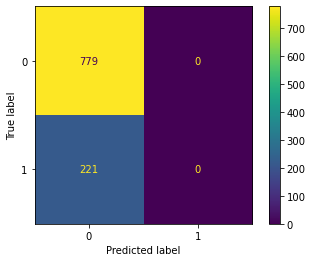


 Accuracy metrics: 
 Accuracy:   77.9

 ROC Curve: 


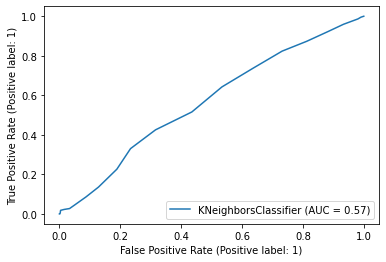

In [84]:
accuracy = round(100*accuracy_score(test_target,predictions),2)
cm = confusion_matrix(test_target,predictions)
print(" Confusion Matrix: ")
plot_confusion_matrix(model,test_features,test_target,cmap='viridis')
plt.show()
print("\n Accuracy metrics: ")
print(" Accuracy:  ",accuracy)
print("\n ROC Curve: ")
plot_roc_curve(model,test_features,test_target)
plt.show()

In [23]:
predictions[0],test_target[0]

(0, 0)

In [24]:
predictions[3],test_target[3]

(0, 0)

In [25]:
predictions[994],test_target[994]

(0, 0)

In [66]:
def KnnBest(k):
    model2=KNeighborsClassifier(n_neighbors=k, p=2,metric='euclidean')
    model2.fit(train_features,train_target)
    predicts=model2.predict(test_features)
    print("k : ",k,"\tAccuracy Score : ",accuracy_score(test_target,predicts))

In [67]:
for i in range(50,100,10):
    KnnBest(i)

k :  50 	Accuracy Score :  0.779
k :  60 	Accuracy Score :  0.779
k :  70 	Accuracy Score :  0.779
k :  80 	Accuracy Score :  0.779
k :  90 	Accuracy Score :  0.779


In [68]:
for i in range(100,150,10):
    KnnBest(i)

k :  100 	Accuracy Score :  0.779
k :  110 	Accuracy Score :  0.779
k :  120 	Accuracy Score :  0.779
k :  130 	Accuracy Score :  0.779
k :  140 	Accuracy Score :  0.779


In [69]:
for i in range(150,200,10):
    KnnBest(i)

k :  150 	Accuracy Score :  0.779
k :  160 	Accuracy Score :  0.779
k :  170 	Accuracy Score :  0.779
k :  180 	Accuracy Score :  0.779
k :  190 	Accuracy Score :  0.779


# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model1=DecisionTreeClassifier()

In [32]:
model1.fit(train_features,train_target)

DecisionTreeClassifier()

In [33]:
predictions1=model1.predict(test_features)

In [34]:
print(accuracy_score(test_target,predictions1))

0.789
